In [1]:
# Add your imports here
import pandas as pd
from datetime import datetime
import sys
sys.path.append("..")
from helper import *

In [2]:
DATA_FROM_CLUSTER_PATH = "../../data/from_cluster/worldcloud_actors/"

In [3]:
DATA_LOCAL_GENERATED_PATH = "../../data/local_generated/"

In [4]:
# Preprocess and clean
for actor_type in ["persons", "locations", "organizations"]:
    actor = pd.read_csv(DATA_FROM_CLUSTER_PATH + actor_type + "_occurences_day.csv").dropna()

    actor = actor.sort_values(['Year', 'Month', 'Day', 'Count'], ascending=[True, True, True, False])

    actor.Year = actor.Year.astype(int)
    actor.Month = actor.Month.astype(int)
    actor.Day = actor.Day.astype(int)

    actor['Date'] = actor.apply(lambda row: datetime(row['Year'], row['Month'], row['Day']), axis=1)
    actor = actor.drop(columns = ['Day', 'Month', 'Year'])
    actor = actor.set_index('Date')

    actor.to_csv(DATA_LOCAL_GENERATED_PATH + actor_type +"_final.csv", sep=",")

# Example: A magnitude-7.8 earthquake struck Nepal on April 25 2015, killing more than 8,800 people.

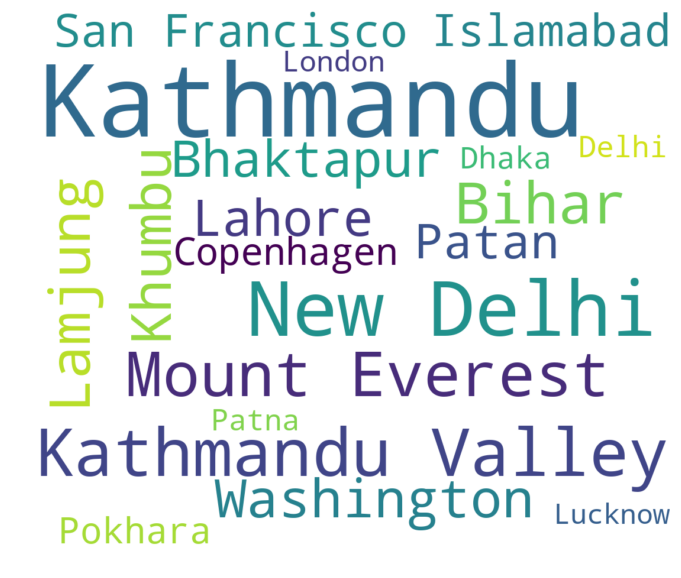

In [4]:
wordcloud_cities(DATA_LOCAL_GENERATED_PATH,20,"2015-04-25")

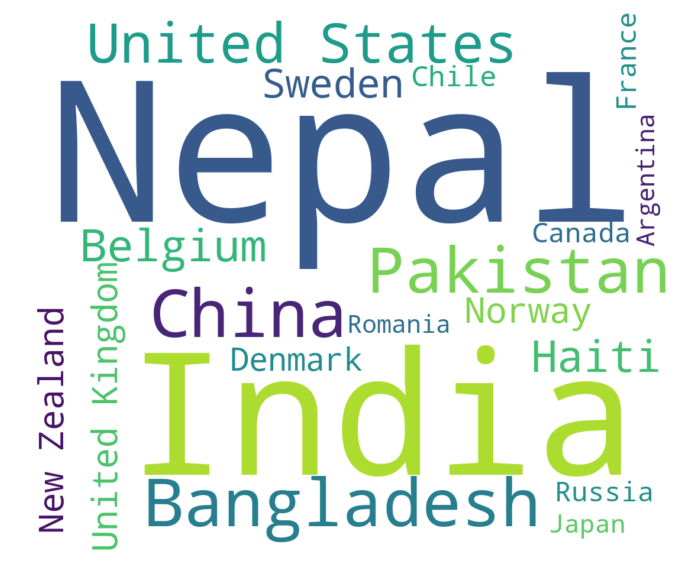

In [6]:
wordcloud_countries(DATA_LOCAL_GENERATED_PATH,20,"2015-04-25")

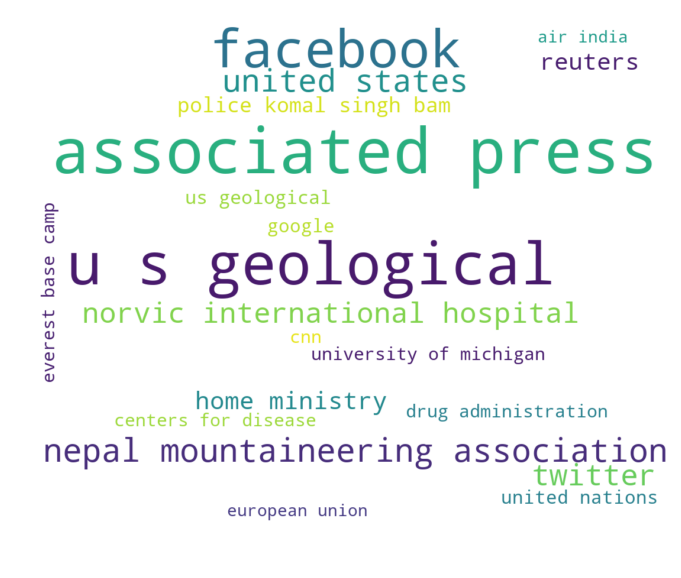

In [7]:
wordcloud_organizations(DATA_LOCAL_GENERATED_PATH,20,"2015-04-25")

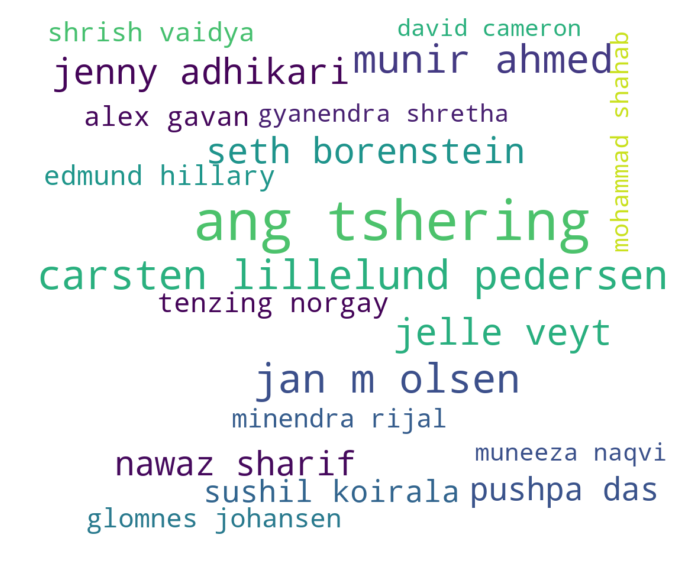

In [8]:
wordcloud_persons(DATA_LOCAL_GENERATED_PATH,20,"2015-04-25")